In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
X = df[['enginesize','horsepower','citympg','highwaympg']]
y = df['price']
X_train , X_test, y_train , y_test = train_test_split(X,y,test_size =0.2 , random_state =42)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled =scaler.transform(X_test)

In [7]:
model = LinearRegression()
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)

In [10]:
print("Name: Rohith S")
print("Reg. No: 25008317")
print("MODEL COEFFICIENTS:")
for feature,coef in zip(X.columns,model.coef_):
    print(f"{feature:}: {coef:}")
print(f"{'Intercept':}: {model.intercept_:}")
print("\nMODEL PERFORMANCE:")
print(f"{'MSE':}:{mean_squared_error(y_test,y_pred):}")
print(f"{'MAE':}:{mean_absolute_error(y_test,y_pred):}")
print(f"{'RMSE':}:{np.sqrt(mean_squared_error(y_test,y_pred)):}")
print(f"{'R-square':}:{r2_score(y_test,y_pred):}")

Name: Rohith S
Reg. No: 25008317
MODEL COEFFICIENTS:
enginesize: 4523.404901011966
horsepower: 1694.2232554525806
citympg: -392.5731841571549
highwaympg: -816.3577991826088
Intercept: 13223.414634146342

MODEL PERFORMANCE:
MSE:16471505.900042146
MAE:2892.628134137953
RMSE:4058.5103055237087
R-square:0.7913520781370976


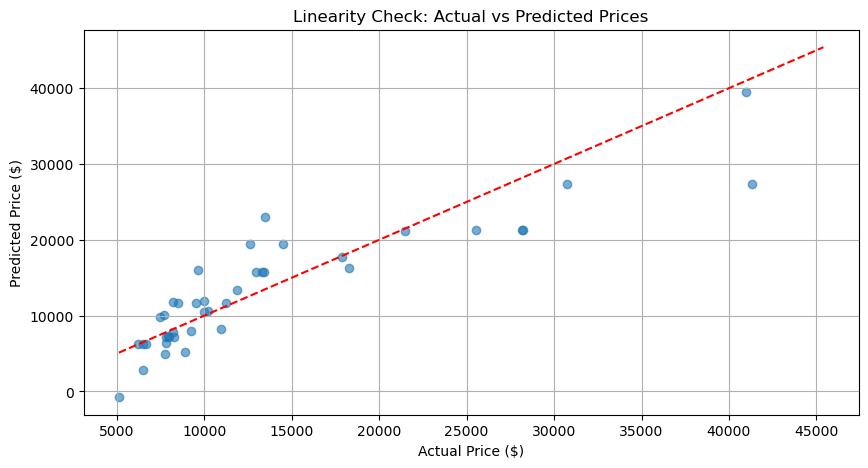

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred,alpha = 0.6)
plt.plot([y.min(),y.max()],[y.min(),y.max()],'r--')
plt.title("Linearity Check: Actual vs Predicted Prices")
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.grid(True)
plt.show()


In [12]:
residuals = y_test - y_pred
dw_test = sm.stats.durbin_watson(residuals)
print(f"\nDurbin-Watson Statistic: {dw_test:.2f}","\n(Values close to 2 indicate no autocorrelation)")


Durbin-Watson Statistic: 2.28 
(Values close to 2 indicate no autocorrelation)


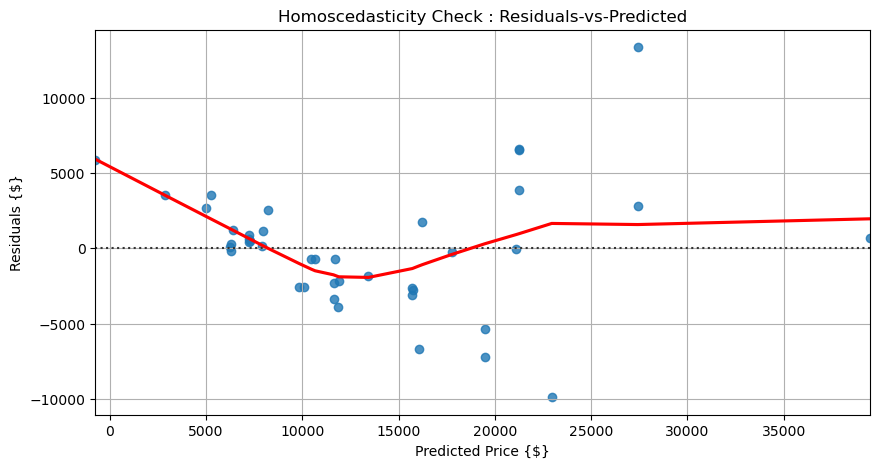

In [15]:
plt.figure(figsize=(10,5))
sns.residplot(x=y_pred, y= residuals , lowess = True , line_kws={'color': 'red'})
plt.title("Homoscedasticity Check : Residuals-vs-Predicted")
plt.xlabel("Predicted Price {$}")
plt.ylabel("Residuals {$}")
plt.grid(True)
plt.show()

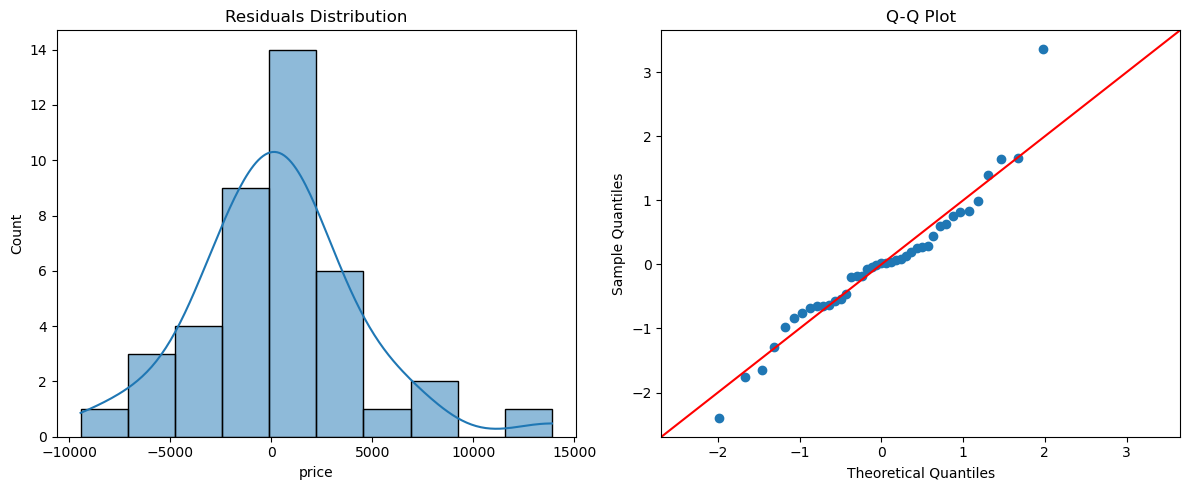

In [19]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
sns.histplot(residuals , kde=True , ax=ax1)
ax1.set_title("Residuals Distribution")
sm.qqplot(residuals, line='45' , fit = True , ax=ax2)
ax2.set_title("Q-Q Plot")
plt.tight_layout()
plt.show()